## Задача 1. 60 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственник, риелтор, застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 10 баллов

In [1]:
import pandas as pd

df = pd.read_csv('rent.csv', index_col=0)

1. Отобразите первые 5 и последние 5 строк. (**1**)

In [3]:
df.head(5)

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [4]:
df.tail(5)

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35
1445,Rasskazovka,30000,walk,2728,owner,0,12,10,17,22,8,33


2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

In [5]:
df.describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['metro', 'way', 'provider'], dtype='object')

In [10]:
print(f'Уникальных значений metro: {df['metro'].nunique()}')

Уникальный значений metro: 119


4. Есть ли в датасете пропуски? (**1**)

In [13]:
print(df.isna().any().any())

False


5. Есть ли в датасете полные дубликаты? (**1**)

In [29]:
duplicates_count = df.duplicated(keep=False).sum()
duplicates_count

np.int64(1234)

6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**1**)

In [30]:
print(f'Уникальных значений provider: {df['provider'].nunique()}')

Уникальных значений provider: 7


Присутствуют лишние пробелы в начале и конце строк

Как их исправить:

Удалить лишние пробелы и символы.
Привести значения к единому формату.

7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**1**)

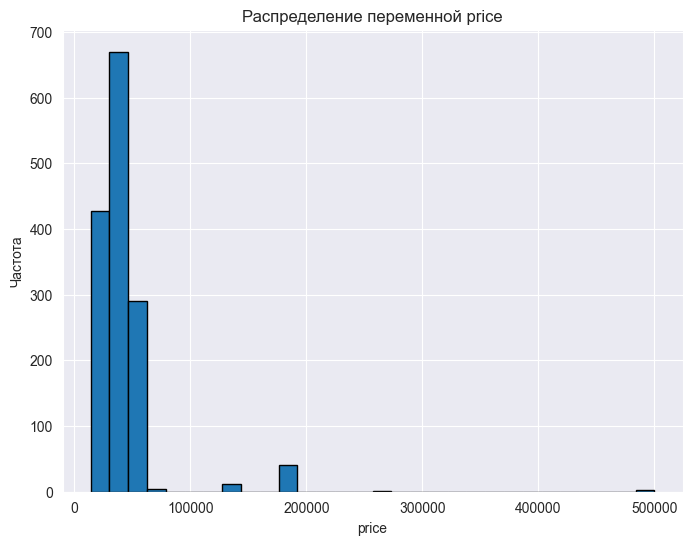

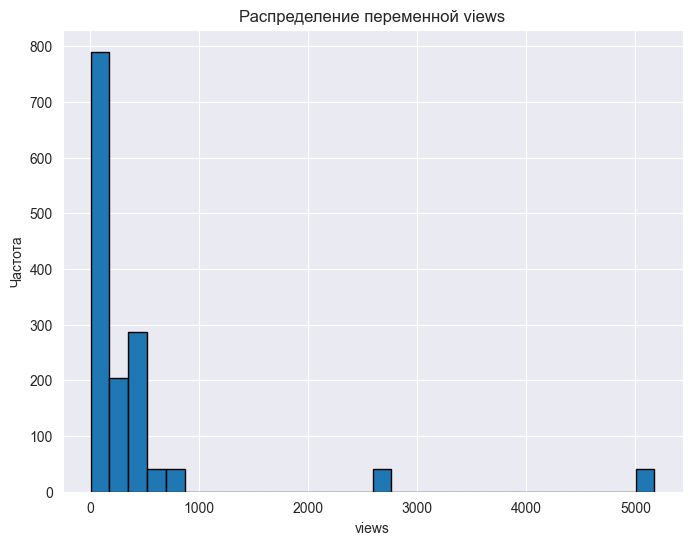

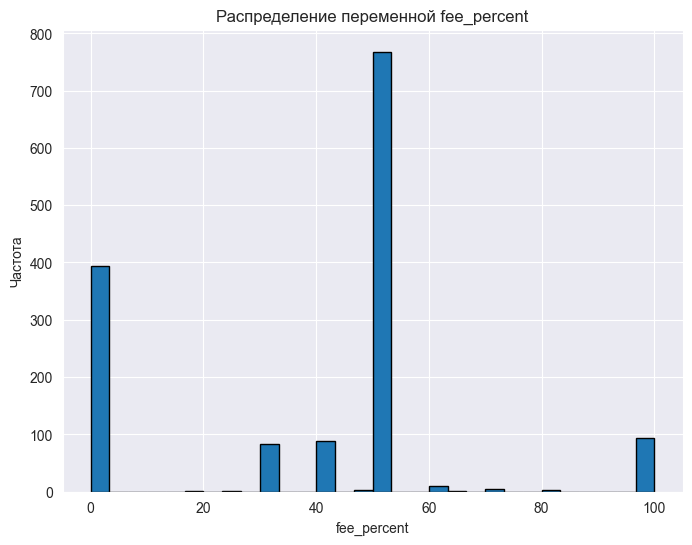

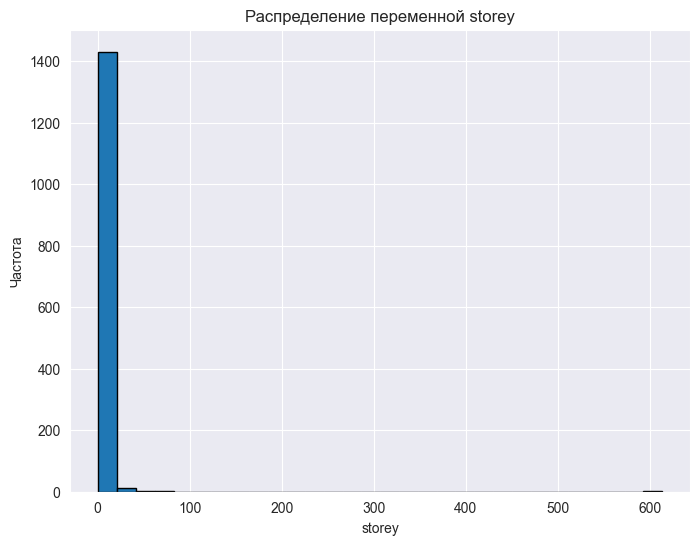

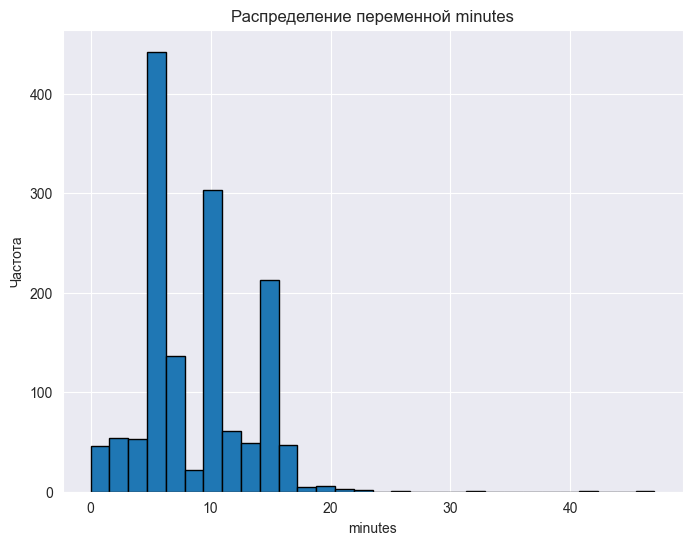

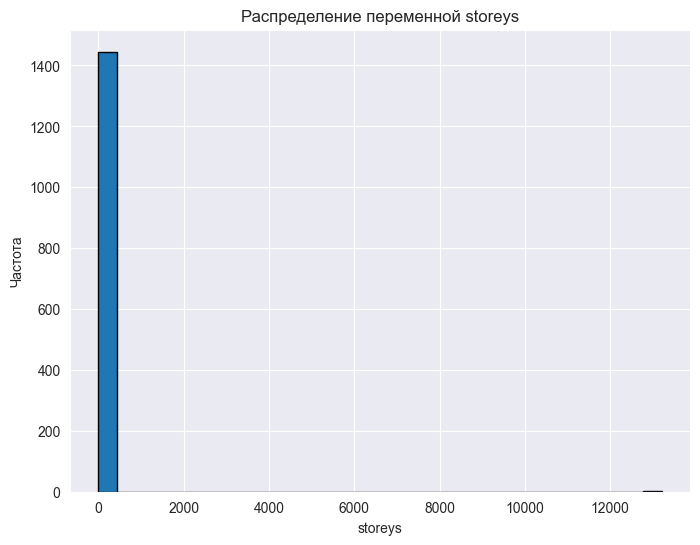

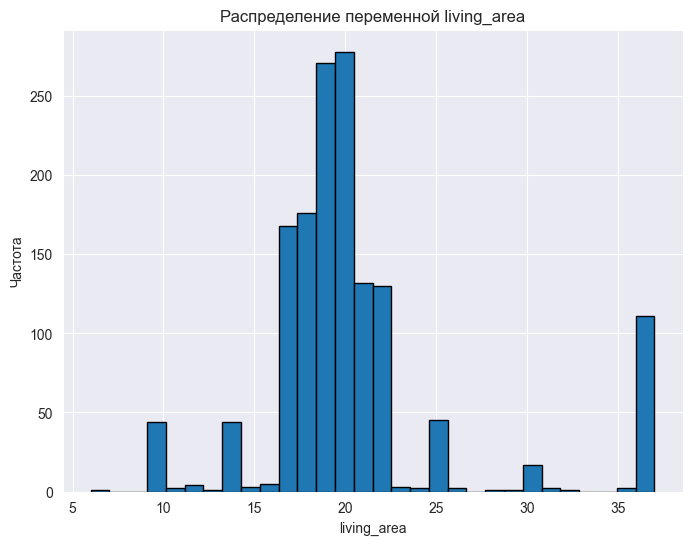

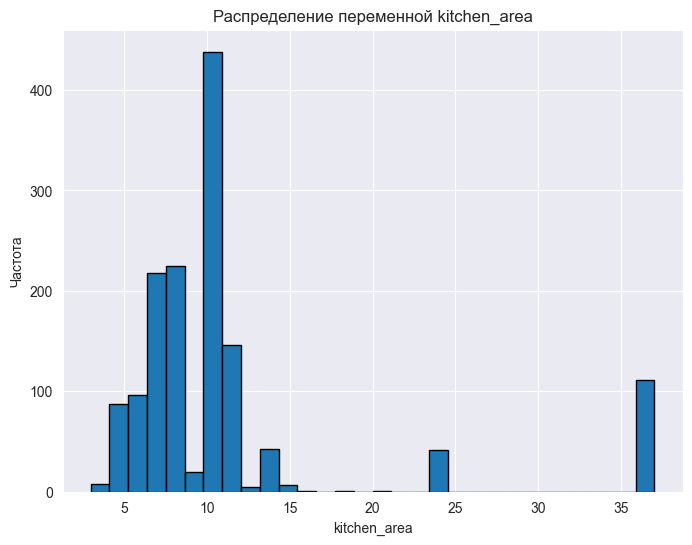

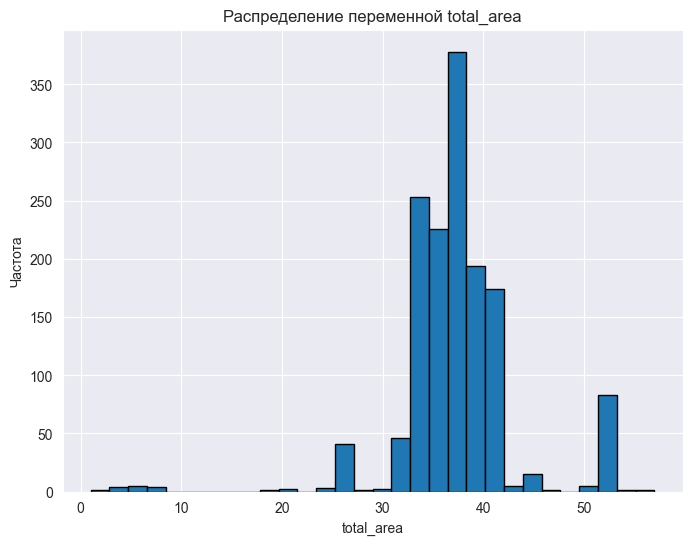

In [4]:
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Распределение переменной {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()


8. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

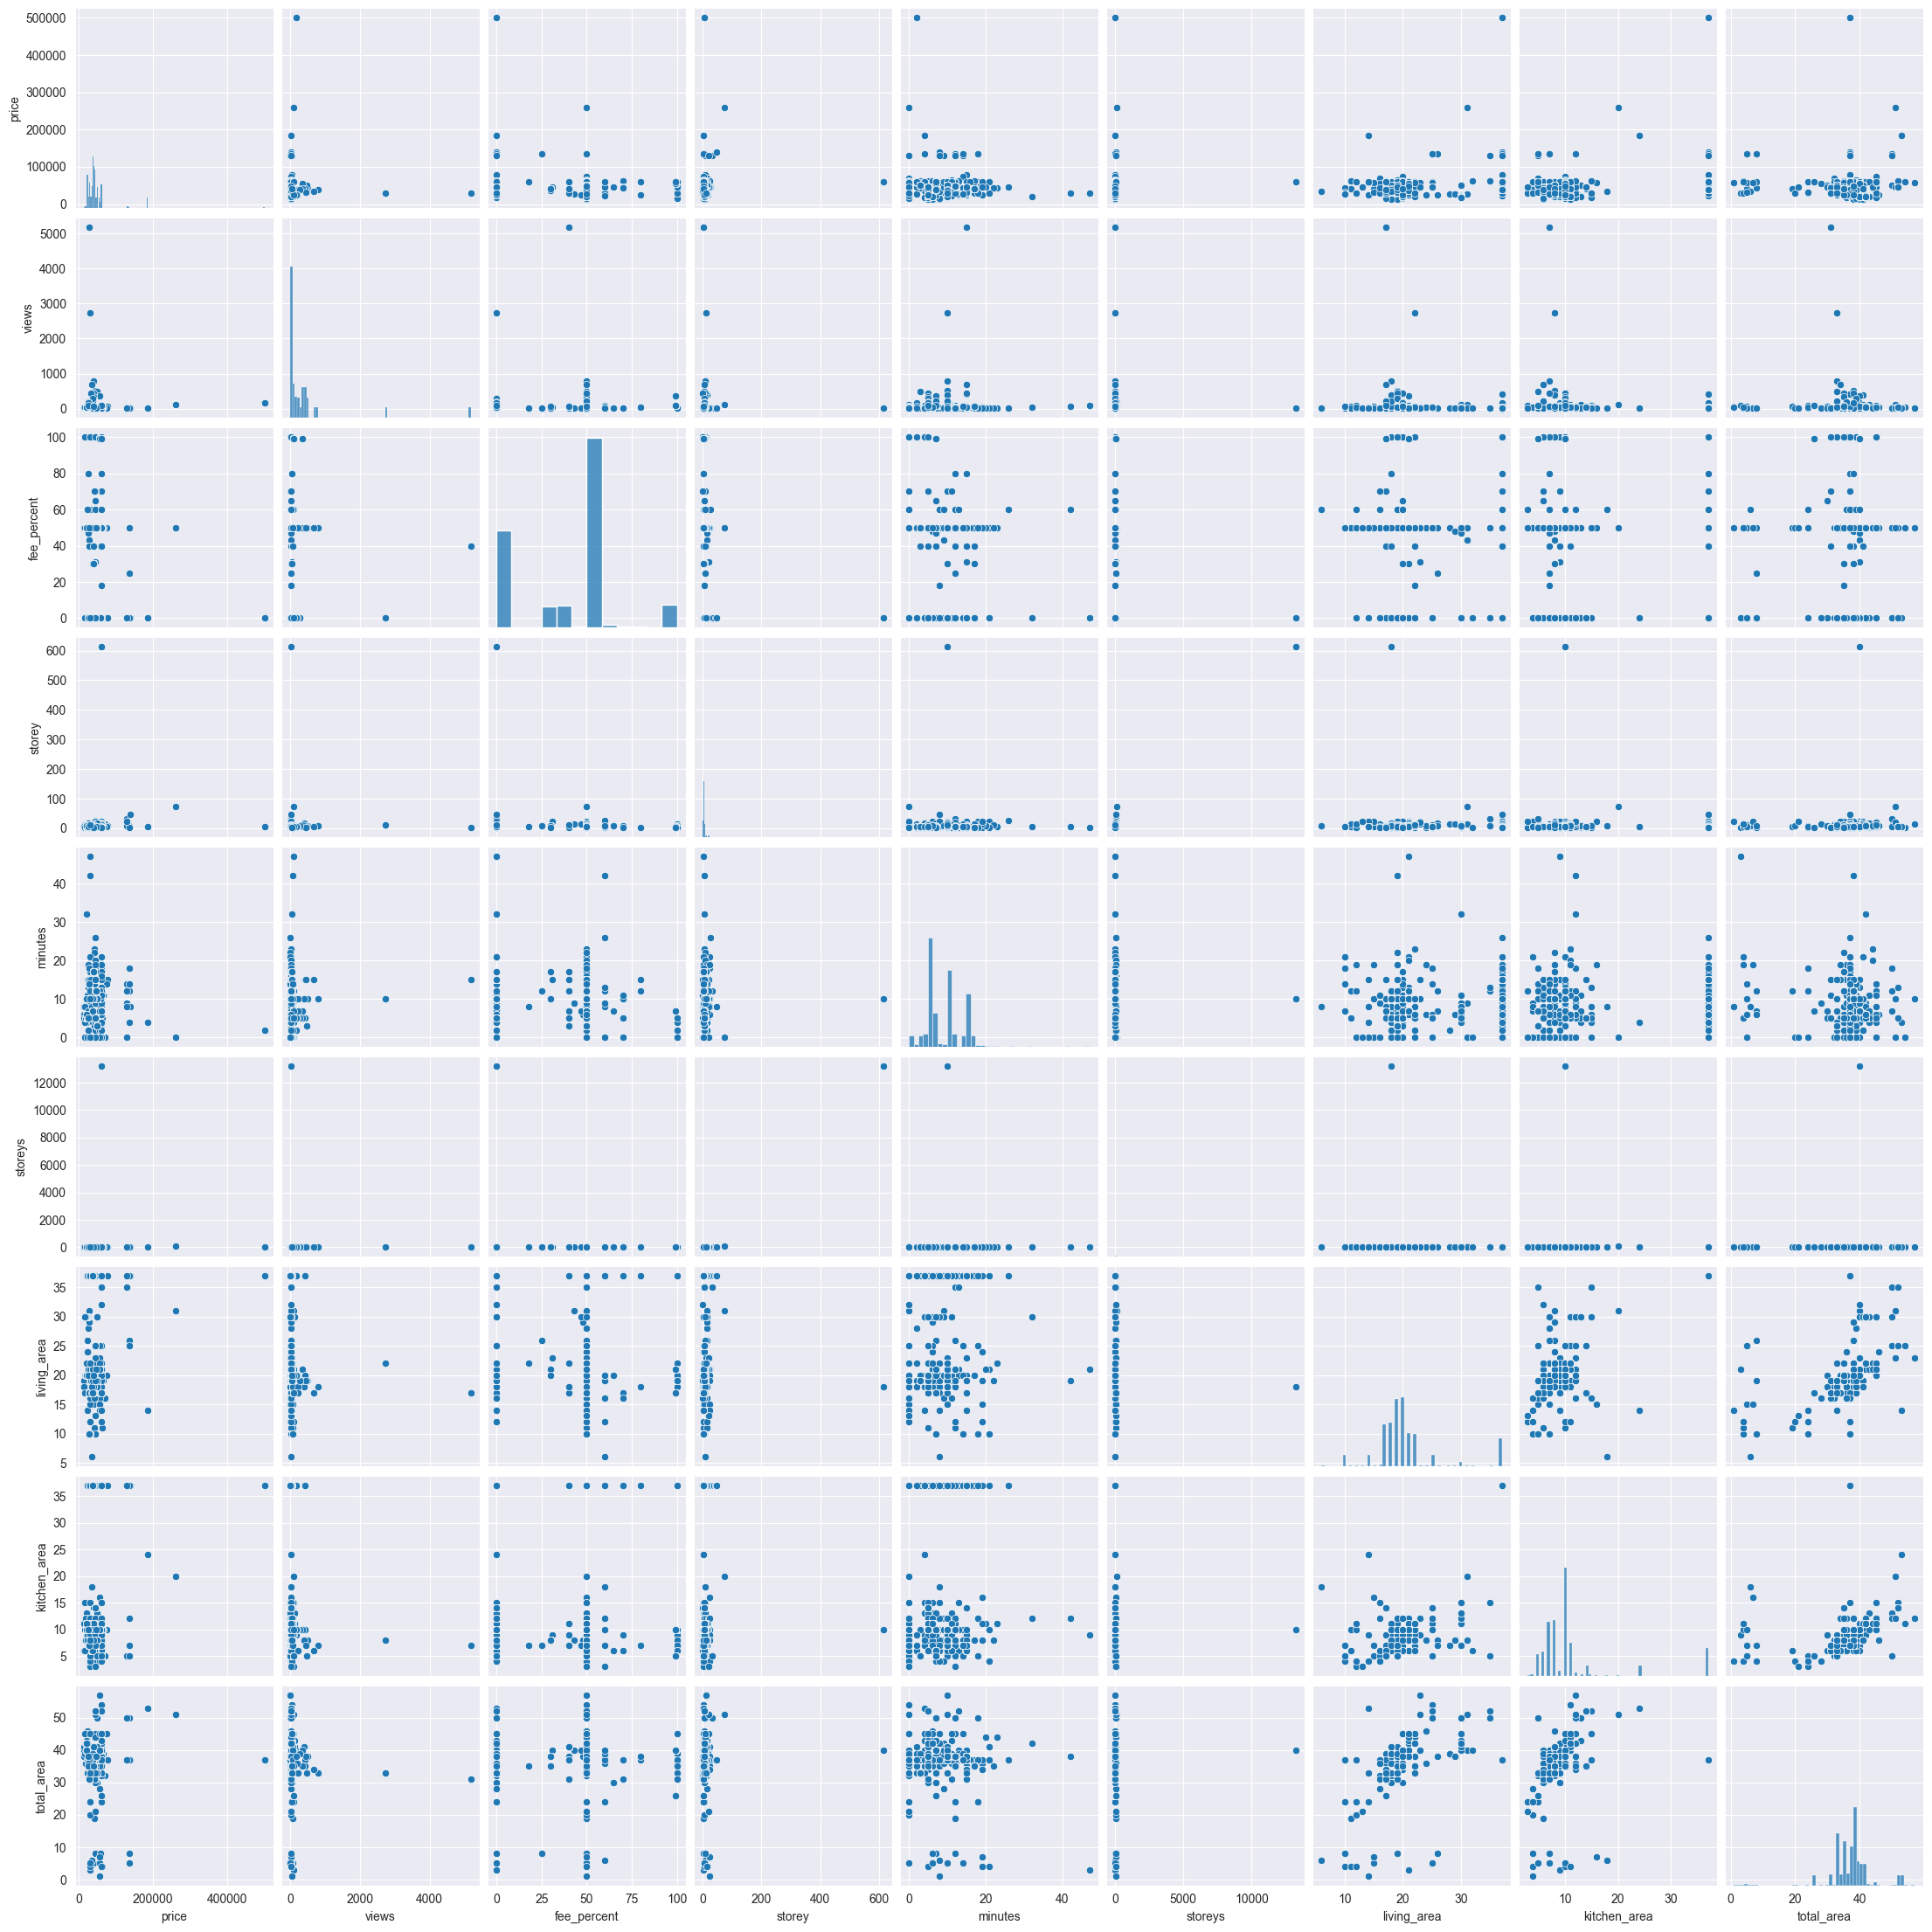

In [32]:
import seaborn as sns

sns.pairplot(df[numerical_columns].dropna())
plt.show()

9. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**2**)

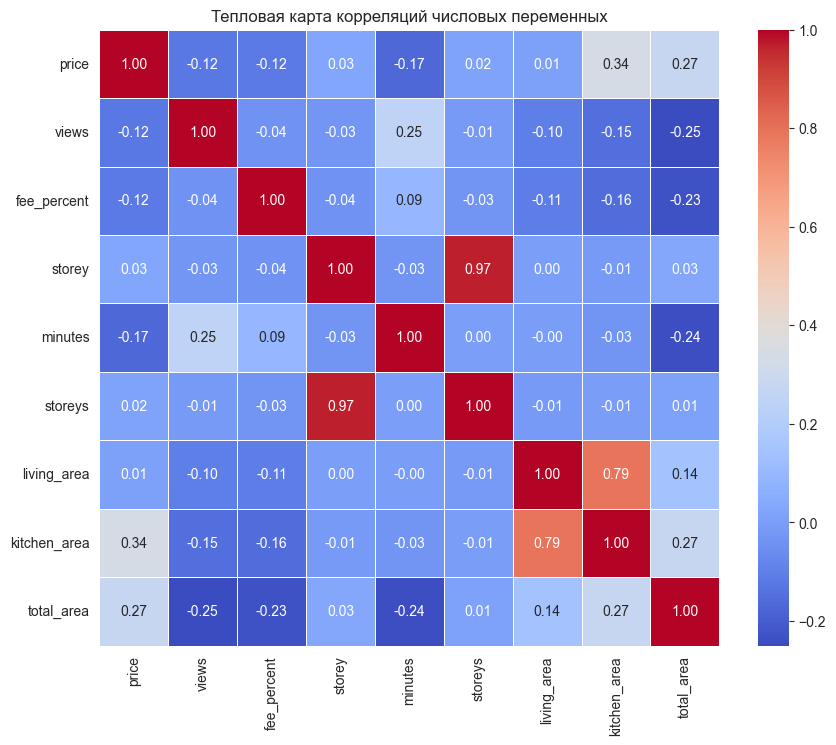

In [33]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляций числовых переменных')
plt.show()

Наиболее сильная положительная корреляция наблюдается между переменными storey и storeys (корреляция = 0.97).
Также заметна корреляция между living_area и kitchen_area (корреляция = 0.79), что говорит о некоторой линейной зависимости между жилой и куханой площадью.

#### Часть 2. Построение модели. 50 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X = df[numerical_columns].drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [7]:
mse = MSE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)

print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}')

MSE: 941086139329.66, RMSE: 970095.94


3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [26]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = ohe.fit_transform(df[['way', 'provider']])
encoded_column_names = ohe.get_feature_names_out(['way', 'provider'])
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names, index=df.index)
df_encoded = pd.concat([df.drop(columns=['way', 'provider', 'price']), encoded_df], axis=1)

numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_columns)

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_enc = LinearRegression()
model_enc.fit(X_train_enc, y_train_enc)

y_pred_enc = model_enc.predict(X_test_enc)

mse = MSE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)

print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}')

MSE: 941086139329.66, RMSE: 970095.94


4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах, $Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [27]:
import numpy as np

Q1 = np.percentile(y_train_enc, 25)
Q3 = np.percentile(y_train_enc, 75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers_removed_idx = y_train_enc <= upper_bound
X_train_no_outliers = X_train_enc[outliers_removed_idx]
y_train_no_outliers = y_train_enc[outliers_removed_idx]

model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

y_pred_no_outliers = model_no_outliers.predict(X_test_enc)

mse_no_outliers = MSE(y_test_enc, y_pred_no_outliers)
rmse_no_outliers = RMSE(y_test_enc, y_pred_no_outliers)

print(f'MSE (без выбросов): {mse_no_outliers:.2f}, RMSE (без выбросов): {rmse_no_outliers:.2f}')

MSE (без выбросов): 108289088373.58, RMSE (без выбросов): 329073.07


5. Попробуйте написать свою реализацию функций MSE, RMSE, R2. Функции должны принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат. Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (**9**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

R2 (коэффициент детерминации) - доля дисперсии, объясненная моделью. Поподробнее о реалиации можно почитать здесь: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

In [28]:
def MSE(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [29]:
def RMSE(y_true, y_pred):
    rmse = np.sqrt(MSE(y_true, y_pred))
    return rmse

In [41]:
def R2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2_score = 1 - (ss_res / ss_tot)  # R2
    return r2_score

6. Напишите класс CleanData. Этот класс будет отвечать за заполнение пропусков и кодирование переменных методами OneHotEncoding и MeanTargetEncoding. (**15**). В классе обязательно должны присутствовать методы fit и transform. transform должен возвращать трансформированный датасет.
Пользователь при создании экземпляра класса может указывать:
- список столбцов для кодирования OneHotEncoding
- список столбцов для кодирования MeanTargetEncoding
- стратегию заполнения пропусков (заполнение средним / медианным значением и т.п.; можете принимать на вход словарь, чтобы реализовать разные стратегии для разных столбцов)

 Все остальные особенности реализации остаются на Ваше усмотрение.

In [38]:
class CleanData:
    def __init__(self, ohe_columns=None, mte_columns=None, fill_strategy=None):
        """
        ohe_columns: список столбцов для кодирования OneHotEncoding
        mte_columns: список столбцов для кодирования MeanTargetEncoding
        fill_strategy: словарь со стратегиями заполнения пропусков (например, {'col1': 'mean', 'col2': 'median'})
        """
        self.ohe_columns = ohe_columns if ohe_columns is not None else []
        self.mte_columns = mte_columns if mte_columns is not None else []
        self.fill_strategy = fill_strategy if fill_strategy is not None else {}
        self.ohe_encoders = {}
        self.mte_means = {}
        self.fill_values = {}

    def fit(self, X, y=None):
        for column, strategy in self.fill_strategy.items():
            if strategy == 'mean':
                self.fill_values[column] = X[column].mean()
            elif strategy == 'median':
                self.fill_values[column] = X[column].median()

        for col in self.ohe_columns:
            ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
            ohe.fit(X[[col]])
            self.ohe_encoders[col] = ohe

        if y is not None:
            for col in self.mte_columns:
                self.mte_means[col] = X.groupby(col)[y.name].mean().to_dict()

        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()

        for column, value in self.fill_values.items():
            X_transformed[column] = X_transformed[column].fillna(value)

        # OneHotEncoding
        for col, encoder in self.ohe_encoders.items():
            encoded_cols = encoder.transform(X_transformed[[col]])
            encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out([col]),
                                      index=X_transformed.index)
            X_transformed = pd.concat([X_transformed, encoded_df], axis=1).drop(columns=[col])

        # MeanTargetEncoding
        if y is not None:
            for col in self.mte_columns:
                X_transformed[col] = X_transformed[col].map(self.mte_means[col])

        return X_transformed

7. Создайте и обучите пайплайн из CleanData, StandardScaler, LinearRegression. Посчитайте метрики. **(6)**

In [44]:
from sklearn.pipeline import Pipeline

ohe_columns = categorical_columns
fill_strategy = {col: 'mean' for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'price'}

cleaner = CleanData(ohe_columns=ohe_columns, mte_columns=[], fill_strategy=fill_strategy)

X = df.drop(columns='price')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('clean_data', cleaner),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = MSE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)
r2_value = R2(y_test, y_pred)

print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2_value :.2f}')

MSE: 583331967017.19, RMSE: 763761.72, R2: -531.12


C:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Задача 2. (15 баллов)

### 2.1 (10)
Напишите код, который будет асинхронно загружать данные из нескольких веб-страниц. Используйте библиотеку aiohttp для выполнения HTTP-запросов. Программа должна выводить количество символов, загруженных из каждой страницы.

In [51]:
import asyncio
import aiohttp


async def fetch(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            content = await response.text()
            return content


# ваш код

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results = await asyncio.gather(*tasks)

    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")


urls = [
    "https://www.python.org",
    "https://www.wikipedia.org",
    "https://www.github.com"
]

await main(urls)

https://www.python.org: 51296 символов
https://www.wikipedia.org: 108300 символов
https://www.github.com: 256843 символов


### 2.2 (**5**)

Какие ошибки могут возникнуть в процессе исполнения кода выше? Как их можно обработать? Добавьте обработку ошибок в Ваш код.

aiohttp.ClientConnectorError – проблемы с подключением к серверу.
aiohttp.ClientResponseError – ошибки, связанные с HTTP-ответами (статус-коды).
TimeoutError – если запрос не был завершен в течение указанного времени.
aiohttp.InvalidURL – неверный формат URL.
asyncio.CancelledError – запрос был отменён (например, при достижении тайм-аута).

In [52]:
from aiohttp import ClientConnectorError, ClientResponseError, InvalidURL


async def fetch(url):
    try:
        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:
                response.raise_for_status()
                content = await response.text()
                return content
    except ClientConnectorError:
        print(f"Ошибка подключения при попытке соединиться с {url}")
    except ClientResponseError as e:
        print(f"Ошибка HTTP: {e.status} при попытке получить доступ к {url}")
    except InvalidURL:
        print(f"Неверный URL: {url}")
    except asyncio.TimeoutError:
        print(f"Тайм-аут при загрузке {url}")
    except Exception as e:
        print(f"Произошла ошибка: {e} при загрузке {url}")
    return ""


async def main(urls):
    tasks = [fetch(url) for url in urls]
    results = await asyncio.gather(*tasks)

    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")


urls = [
    "https://www.python.org",
    "https://www.wikipedia.org",
    "https://www.github.com",
    "https://invalid-url.com",
]

await main(urls)

Ошибка подключения при попытке соединиться с https://invalid-url.com
https://www.python.org: 51296 символов
https://www.wikipedia.org: 108300 символов
https://www.github.com: 256844 символов
https://invalid-url.com: 0 символов


## Задава 3 (25 баллов)


Напишите класс **Task**. У него должны быть следующие атрибуты:
* `number` - номер задачи
* `name` - название задачи


Напишите метод `init` (**2 балла**)

Переопределите для класса метод `str`, который вернет строку вида `f"{number}.{name}"`. (**3 балла**)

Теперь напишите класс **ProgrammingTask**, который является наследником класса Task.

Он должен дополнительно иметь методы:
* `language` - язык программирования (строка) - **1 балла**
* `list_of_students` - список студентов (список list, элементы которого - строки), которые решили задачу. По умолчанию список пустой. **(1 балл)**


Этот класс должен поддерживать следующие методы:
* `str `- вернет строку вида `f"{number}.{name} ({language})"`. **2 балла**
* `get_student_list`(без дополнительных аргументов) - возвращает значение `list_of_students`. **2 балла**
* `add_student` - принимает строку с фамилией студента и обновляет аргумент `list_of_students`. **2 балла**
* `task_from_str` - метод, который принимает на вход строку в формате `f"{number}.{name}.{language}"`
и возращает объект `Task` с соответствующими значениями number и name и значением `list_of_students` - пустой список. **2 балла**
* добавьте возможность сравнивать задачи между собой с помощью знака `==`. Сравнение должно возвращать True, если у задач совпадают номера и названия. **2 балла**


Создайте список задач tasklist (это объект list, каждый элемент которого - объект Task или ProgrammingTask).
Добавьте в него пять любых задач. **2 балла**

Отсортируйте задачи по номеру, при совпадении номеров - по названию.  **2 балла**

Добавьте аннотацию типов с помощью typing.  **2 балла**

Напишите docstrings ко всем методам.  **2 балла**

In [53]:
from typing import List, Union

class Task:
    """
    Класс Task представляет задачу с номером и названием.
    """
    
    def __init__(self, number: int, name: str) -> None:
        """
        Инициализация задачи.

        :param number: Номер задачи.
        :param name: Название задачи.
        """
        self.number = number
        self.name = name

    def __str__(self) -> str:
        """
        Переопределение метода str для вывода задачи в формате "{number}.{name}".

        :return: Строка с номером и названием задачи.
        """
        return f"{self.number}.{self.name}"

    def __eq__(self, other: 'Task') -> bool:
        """
        Переопределение оператора == для сравнения задач по номеру и названию.

        :param other: Другая задача для сравнения.
        :return: True, если номера и названия совпадают, иначе False.
        """
        return self.number == other.number and self.name == other.name


class ProgrammingTask(Task):
    """
    Класс ProgrammingTask представляет задачу по программированию,
    которая наследуется от класса Task.
    """
    
    def __init__(self, number: int, name: str, language: str) -> None:
        """
        Инициализация задачи по программированию.

        :param number: Номер задачи.
        :param name: Название задачи.
        :param language: Язык программирования задачи.
        """
        super().__init__(number, name)
        self.language = language
        self.list_of_students: List[str] = []

    def __str__(self) -> str:
        """
        Переопределение метода str для вывода задачи в формате "{number}.{name} ({language})".

        :return: Строка с номером, названием и языком программирования.
        """
        return f"{self.number}.{self.name} ({self.language})"

    def get_student_list(self) -> List[str]:
        """
        Возвращает список студентов, которые решили задачу.

        :return: Список студентов.
        """
        return self.list_of_students

    def add_student(self, student: str) -> None:
        """
        Добавляет студента в список решивших задачу.

        :param student: Имя студента.
        """
        self.list_of_students.append(student)

    @classmethod
    def task_from_str(cls, task_str: str) -> 'ProgrammingTask':
        """
        Создает задачу по строковому представлению вида "{number}.{name}.{language}".

        :param task_str: Строка с данными задачи.
        :return: Объект ProgrammingTask.
        """
        number_str, name, language = task_str.split('.')
        return cls(int(number_str), name, language)

In [54]:
# этот код можете использовать для проверки Вашего класса
task1 = Task(1, 'A')
print(task1)
print(task1.number)
print(task1.name)
task2 = ProgrammingTask(1, 'A', 'python')
print(task2)
print(task2.number)
print(task2.name)
print(task2.language)
print(task2.get_student_list())
task2.add_student('Student1')
print(task2.get_student_list())
task3 = ProgrammingTask(1, 'A', 'C++')
task4 = ProgrammingTask(3, 'A', 'python')
print(task2 == task3)
print(task2 == task4)

1.A
1
A
1.A (python)
1
A
python
[]
['Student1']
True
False
